# Breast Cancer AutoML

In [2]:
import autokeras as ak
import pandas as pd

# Importing data
df = pd.read_csv(r'C:\Users\HP\Desktop\Oreilly\Data\data.csv')

#Define the dependent variable that needs to be predicted (labels)
y = df["diagnosis"].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
#################################################################
#Define x and normalize values

#Define the independent variables. Let's also drop Gender, so we can normalize other data
X = df.drop(labels = ["diagnosis", "id"], axis=1) 


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [3]:
# Initialize the ImageClassifier.
clf = ak.StructuredDataClassifier(max_trials=1)

INFO:tensorflow:Reloading Oracle from existing project .\structured_data_classifier\oracle.json
INFO:tensorflow:Reloading Tuner from .\structured_data_classifier\tuner0.json


In [4]:
clf.fit(X_train, y_train, verbose=1, epochs=1)

INFO:tensorflow:Oracle triggered exit
14/14 [==============================] - 1s 4ms/step - loss: 0.5291 - accuracy: 0.8018
INFO:tensorflow:Assets written to: .\structured_data_classifier\best_model\assets


In [5]:
# Evaluate on the testing data.
print("Accuracy: {accuracy}".format(accuracy=clf.evaluate(X_test, y_test)))

5/5 [==============================] - 0s 2ms/step - loss: 0.3477 - accuracy: 0.9441
Accuracy: [0.3477207124233246, 0.9440559148788452]


# Housing Data

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

import autokeras as ak

house_dataset = fetch_california_housing()
df = pd.DataFrame(
    np.concatenate(
        (house_dataset.data, house_dataset.target.reshape(-1, 1)), axis=1
    ),
    columns=house_dataset.feature_names + ["Price"],
)
train_size = int(df.shape[0] * 0.9)
df[:train_size].to_csv("train.csv", index=False)
df[train_size:].to_csv("eval.csv", index=False)
train_file_path = "train.csv"
test_file_path = "eval.csv"


In [8]:
"""
The second step is to run the
[StructuredDataRegressor](/structured_data_regressor).
As a quick demo, we set epochs to 10.
You can also leave the epochs unspecified for an adaptive number of epochs.
"""

# Initialize the structured data regressor.
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)  # It tries 3 different models.
# Feed the structured data regressor with training data.
reg.fit(
    # The path to the train.csv file.
    train_file_path,
    # The name of the label column.
    "Price",
    epochs=10,
)
# Predict with the best model.
predicted_y = reg.predict(test_file_path)
# Evaluate the best model with testing data.
print(reg.evaluate(test_file_path, "Price"))

Trial 3 Complete [00h 00m 15s]
val_loss: 0.8639538884162903

Best val_loss So Far: 0.8639538884162903
Total elapsed time: 00h 00m 42s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
581/581 [==============================] - 1s 2ms/step - loss: 1.7609 - mean_squared_error: 1.7609
Epoch 2/10
581/581 [==============================] - 1s 1ms/step - loss: 0.5327 - mean_squared_error: 0.5327
Epoch 3/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4616 - mean_squared_error: 0.4616
Epoch 4/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4349 - mean_squared_error: 0.4349
Epoch 5/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4204 - mean_squared_error: 0.4204
Epoch 6/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4128 - mean_squared_error: 0.4128
Epoch 7/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4078 - mean_squared_error: 0.4078
Epoch 8/10
581/581 [==============================] - 1s 2

In [9]:
"""
## Data Format
The AutoKeras StructuredDataRegressor is quite flexible for the data format.
The example above shows how to use the CSV files directly. Besides CSV files,
it also supports numpy.ndarray, pandas.DataFrame or [tf.data.Dataset](
https://www.tensorflow.org/api_docs/python/tf/data/Dataset?version=stable). The
data should be two-dimensional with numerical or categorical values.
For the regression targets, it should be a vector of numerical values.
AutoKeras accepts numpy.ndarray, pandas.DataFrame, or pandas.Series.
The following examples show how the data can be prepared with numpy.ndarray,
pandas.DataFrame, and tensorflow.data.Dataset.
"""


# x_train as pandas.DataFrame, y_train as pandas.Series
x_train = pd.read_csv(train_file_path)
print(type(x_train))  # pandas.DataFrame
y_train = x_train.pop("Price")
print(type(y_train))  # pandas.Series

# You can also use pandas.DataFrame for y_train.
y_train = pd.DataFrame(y_train)
print(type(y_train))  # pandas.DataFrame

# You can also use numpy.ndarray for x_train and y_train.
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
print(type(x_train))  # numpy.ndarray
print(type(y_train))  # numpy.ndarray

# Preparing testing data.
x_test = pd.read_csv(test_file_path)
y_test = x_test.pop("Price")

# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=3, overwrite=True)
# Feed the structured data regressor with training data.
reg.fit(x_train, y_train, epochs=10)
# Predict with the best model.
predicted_y = reg.predict(x_test)
# Evaluate the best model with testing data.
print(reg.evaluate(x_test, y_test))

"""
The following code shows how to convert numpy.ndarray to tf.data.Dataset.
"""

train_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

reg = ak.StructuredDataRegressor(max_trials=3, overwrite=True)
# Feed the tensorflow Dataset to the regressor.
reg.fit(train_set, epochs=10)
# Predict with the best model.
predicted_y = reg.predict(test_set)
# Evaluate the best model with testing data.
print(reg.evaluate(test_set))

Trial 3 Complete [00h 00m 17s]
val_loss: 0.9792079925537109

Best val_loss So Far: 0.8766914010047913
Total elapsed time: 00h 00m 52s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
581/581 [==============================] - 2s 2ms/step - loss: 1.5738 - mean_squared_error: 1.5738
Epoch 2/10
581/581 [==============================] - 1s 2ms/step - loss: 0.5531 - mean_squared_error: 0.5531
Epoch 3/10
581/581 [==============================] - 2s 3ms/step - loss: 0.4699 - mean_squared_error: 0.4699
Epoch 4/10
581/581 [==============================] - 1s 3ms/step - loss: 0.4429 - mean_squared_error: 0.4429
Epoch 5/10
581/581 [==============================] - 2s 3ms/step - loss: 0.4310 - mean_squared_error: 0.4310
Epoch 6/10
581/581 [==============================] - 2s 3ms/step - loss: 0.4287 - mean_squared_error: 0.4287
Epoch 7/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4247 - mean_squared_error: 0.4247
Epoch 8/10
581/581 [==============================] - 1s 3

In [11]:
"""
You can also specify the column names and types for the data as follows.  The
`column_names` is optional if the training data already have the column names,
e.g.  pandas.DataFrame, CSV file.  Any column, whose type is not specified will
be inferred from the training data.
"""

# Initialize the structured data regressor.
reg = ak.StructuredDataRegressor(
    column_names=[
        "MedInc",
        "HouseAge",
        "AveRooms",
        "AveBedrms",
        "Population",
        "AveOccup",
        "Latitude",
        "Longitude",
    ],
    column_types={"MedInc": "numerical", "Latitude": "numerical"},
    max_trials=10,  # It tries 10 different models.
    overwrite=True,
)

In [12]:
"""
## Validation Data
By default, AutoKeras use the last 20% of training data as validation data.  As
shown in the example below, you can use `validation_split` to specify the
percentage.
"""

reg.fit(
    x_train,
    y_train,
    # Split the training data and use the last 15% as validation data.
    validation_split=0.15,
    epochs=10,
)

Trial 10 Complete [00h 00m 12s]
val_loss: 0.9242876768112183

Best val_loss So Far: 0.7672959566116333
Total elapsed time: 00h 02m 01s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
581/581 [==============================] - 1s 2ms/step - loss: 1.6596 - mean_squared_error: 1.6596
Epoch 2/10
581/581 [==============================] - 1s 2ms/step - loss: 0.5270 - mean_squared_error: 0.5270
Epoch 3/10
581/581 [==============================] - 2s 4ms/step - loss: 0.4575 - mean_squared_error: 0.4575
Epoch 4/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4382 - mean_squared_error: 0.4382
Epoch 5/10
581/581 [==============================] - 1s 1ms/step - loss: 0.4313 - mean_squared_error: 0.4313
Epoch 6/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4239 - mean_squared_error: 0.4239
Epoch 7/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4189 - mean_squared_error: 0.4189
Epoch 8/10
581/581 [==============================] - 1s 

In [13]:
"""
You can also use your own validation set
instead of splitting it from the training data with `validation_data`.
"""

split = 500
x_val = x_train[split:]
y_val = y_train[split:]
x_train = x_train[:split]
y_train = y_train[:split]
reg.fit(
    x_train,
    y_train,
    # Use your own validation set.
    validation_data=(x_val, y_val),
    epochs=10,
)


In [14]:
"""
## Customized Search Space
For advanced users, you may customize your search space by using
[AutoModel](/auto_model/#automodel-class) instead of
[StructuredDataRegressor](/structured_data_regressor). You can configure the
[StructuredDataBlock](/block/#structureddatablock-class) for some high-level
configurations, e.g., `categorical_encoding` for whether to use the
[CategoricalToNumerical](/block/#categoricaltonumerical-class). You can also do
not specify these arguments, which would leave the different choices to be
tuned automatically. See the following example for detail.
"""


input_node = ak.StructuredDataInput()
output_node = ak.StructuredDataBlock(categorical_encoding=True)(input_node)
output_node = ak.RegressionHead()(output_node)
reg = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True, max_trials=3
)
reg.fit(x_train, y_train, epochs=10)

"""
The usage of [AutoModel](/auto_model/#automodel-class) is similar to the
[functional API](https://www.tensorflow.org/guide/keras/functional) of Keras.
Basically, you are building a graph, whose edges are blocks and the nodes are
intermediate outputs of blocks.  To add an edge from `input_node` to
`output_node` with `output_node = ak.[some_block]([block_args])(input_node)`.
You can even also use more fine grained blocks to customize the search space
even further. See the following example.
"""


input_node = ak.StructuredDataInput()
output_node = ak.CategoricalToNumerical()(input_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.RegressionHead()(output_node)
reg = ak.AutoModel(
    inputs=input_node, outputs=output_node, max_trials=3, overwrite=True
)
reg.fit(x_train, y_train, epochs=10)

"""
You can also export the best model found by AutoKeras as a Keras Model.
"""

model = reg.export_model()
model.summary()
# numpy array in object (mixed type) is not supported.
# you need convert it to unicode or float first.
model.predict(x_train)


Trial 3 Complete [00h 00m 02s]
val_loss: 1.4252915382385254

Best val_loss So Far: 1.1471083164215088
Total elapsed time: 00h 00m 07s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 397.3979 - mean_squared_error: 397.3979
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 24.5701 - mean_squared_error: 24.5701
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 5.9549 - mean_squared_error: 5.9549
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 2.3570 - mean_squared_error: 2.3570
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 1.6250 - mean_squared_error: 1.6250
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 1.8229 - mean_squared_error: 1.8229
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 1.3632 - mean_squared_error: 1.3632
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - 

array([[ 2.0662608 ],
       [ 4.3988223 ],
       [ 2.553985  ],
       [ 2.6371913 ],
       [ 2.386169  ],
       [ 3.0398974 ],
       [ 2.3688388 ],
       [ 2.3571124 ],
       [ 2.0415225 ],
       [ 2.9488406 ],
       [ 2.7735171 ],
       [ 3.5597873 ],
       [ 3.0091357 ],
       [ 1.7624087 ],
       [ 3.0427737 ],
       [ 2.4478564 ],
       [ 2.5423236 ],
       [ 2.398418  ],
       [ 1.9226565 ],
       [ 1.6894488 ],
       [ 1.5680499 ],
       [ 2.429912  ],
       [ 1.9710727 ],
       [ 1.8681827 ],
       [ 2.0852237 ],
       [ 1.8553004 ],
       [ 2.299358  ],
       [ 2.9348865 ],
       [ 2.1309085 ],
       [ 1.701755  ],
       [ 1.7480044 ],
       [ 2.2644382 ],
       [ 1.9340549 ],
       [ 2.29079   ],
       [ 3.1681552 ],
       [ 2.0950046 ],
       [ 2.5745044 ],
       [ 2.6543841 ],
       [ 2.5903811 ],
       [ 3.4082217 ],
       [ 2.7867541 ],
       [ 1.8827395 ],
       [ 1.5820384 ],
       [ 2.0760036 ],
       [ 2.4783053 ],
       [ 2

# Fraud Detection

In [15]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Oreilly\Data\creditcard.csv')

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [18]:
df.drop(['Time'], axis=1, inplace=True)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [23]:
# Initialize the ImageClassifier.
clf = ak.StructuredDataClassifier(max_trials=1)

INFO:tensorflow:Reloading Oracle from existing project .\structured_data_classifier\oracle.json
INFO:tensorflow:Reloading Tuner from .\structured_data_classifier\tuner0.json


In [24]:
clf.fit(X_train, y_train, verbose=1, epochs=1)

INFO:tensorflow:Oracle triggered exit
6461/6461 [==============================] - 12s 2ms/step - loss: 0.0275 - accuracy: 0.9934
INFO:tensorflow:Assets written to: .\structured_data_classifier\best_model\assets


In [25]:
# Evaluate on the testing data.
print("Accuracy: {accuracy}".format(accuracy=clf.evaluate(X_test, y_test)))

2154/2154 [==============================] - 3s 1ms/step - loss: 0.0032 - accuracy: 0.9993
Accuracy: [0.003226163797080517, 0.99931800365448]


Imported Auto_ViML version: 0.1.684. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (275663, 30)
    Training Set Memory Usage = 65.20 MB
Single_Label Target: ['Class']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:  275190  ->   99.8%
           1:     473  ->    0.2%
    Target Class is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    29 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T 

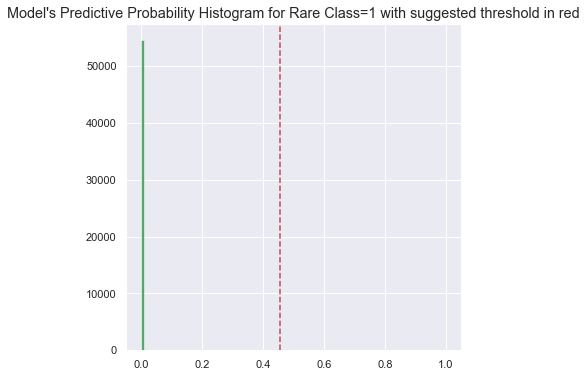

    Using threshold=0.5. However, 0.457 provides better F1=0.88 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 100.0%
Balanced Accuracy = 90.52% with Threshold = 0.50
Confusion Matrix:
[[55033     5]
 [   18    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55038
           1       0.94      0.81      0.87        95

    accuracy                           1.00     55133
   macro avg       0.97      0.91      0.93     55133
weighted avg       1.00      1.00      1.00     55133

Balanced Accuracy = 91.05% with Threshold = 0.46
Confusion Matrix:
[[55033     5]
 [   17    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55038
           1       0.94      0.82      0.88        95

    accuracy                           1.00     55133
   macro avg       0.97   

Could not plot Model Evaluation Results Metrics
    Time taken for this Target (in seconds) = 239
    Binning_Flag set to False or there are no float vars in data set to be binned
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Adding 2 Stacking feature(s) to training data
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
##################  Imbalanced Model Training  ############################
Imbalanced Training using SMOTE Rare Class Oversampling method...
Using SMOTE's over-sampling techniques to make the 2 classes balanced...
    class_weights = [ 0.05008594 29.13985201]
    class_weighted_rows = {0: 275190, 1: 13783}
Training model now on resampled train data: (288973, 25). This will take time...
    Resampled data Training time taken = 107 seconds
##################  Completed Imbalanced Training using XGBClassifier ################
     Actual Training time t

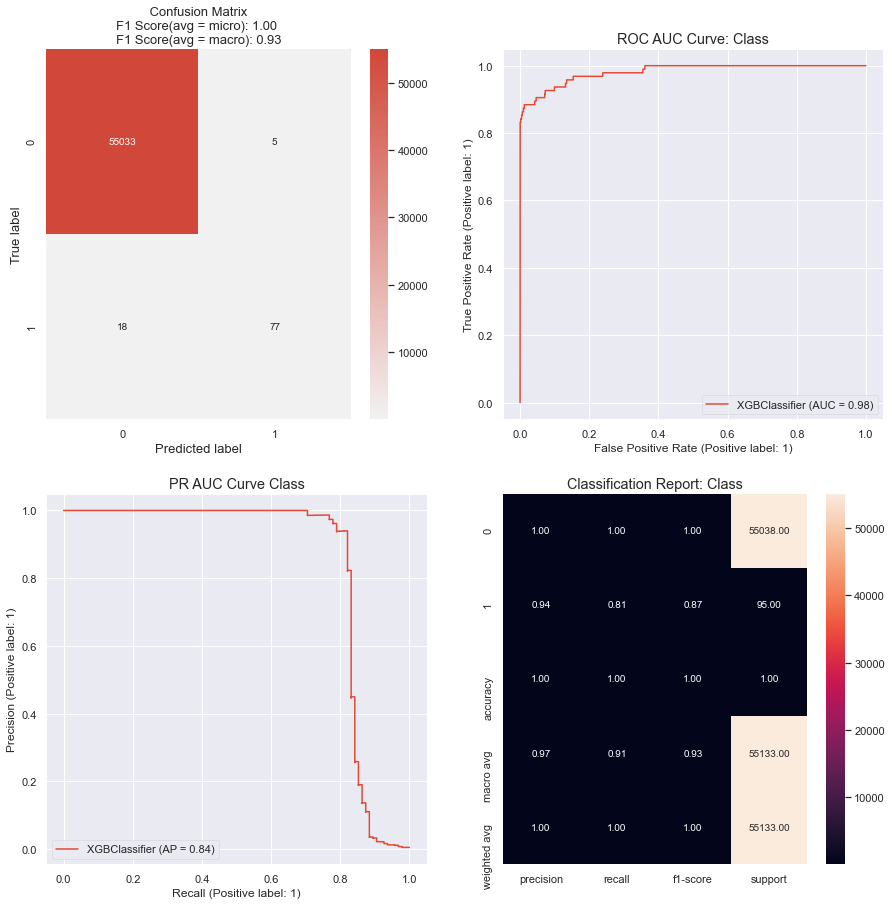

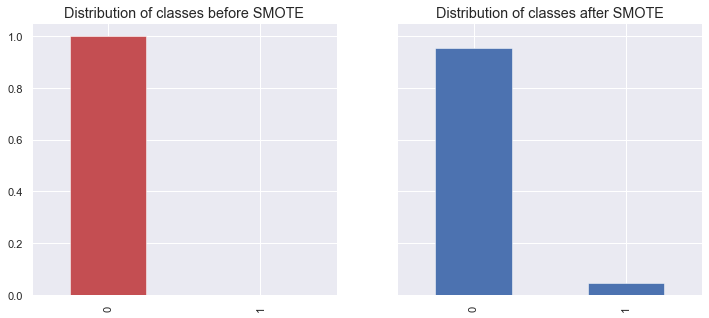

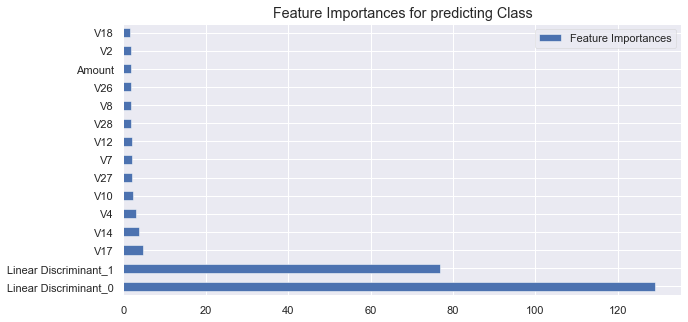

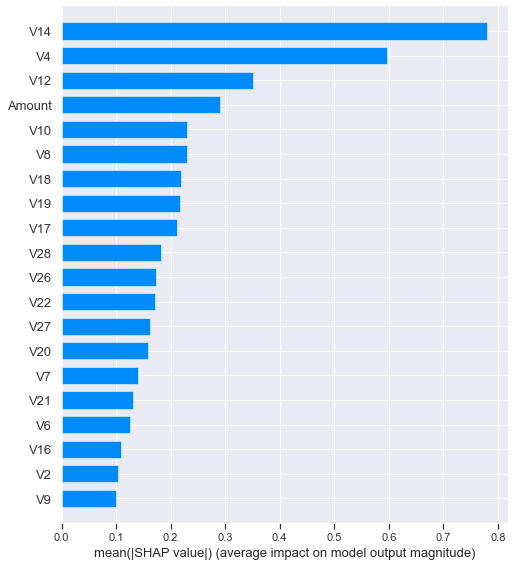

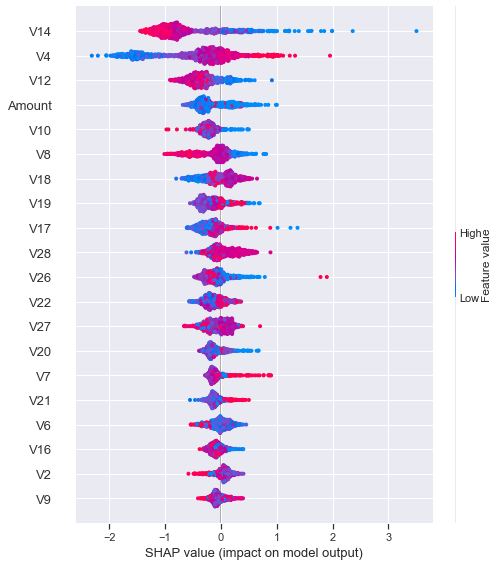

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 440
Writing Output files to disk...
    Saving predictions to .\Class\Class_Binary_Classification_test_modified.csv
    Saving predictions to .\Class\Class_Binary_Classification_submission.csv
    Saving predictions to .\Class\Class_Binary_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 8.3 for the Entire Process


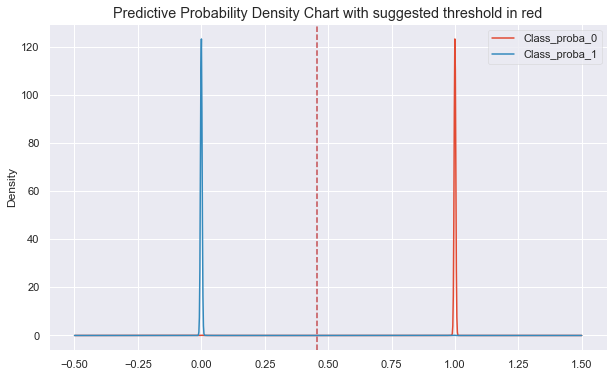

In [26]:
from autoviml.Auto_ViML import Auto_ViML

model, features, trainm, testm = Auto_ViML(
    train=df,
    target="Class",
    test="",
    sample_submission="",
    hyper_param="RS",
    feature_reduction=True,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=False,
    Boosting_Flag=True,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=True,
    Imbalanced_Flag=True,
    verbose=3
)

In [29]:
import h2o
from h2o.automl import H2OAutoML

h2o.init(
    nthreads=-1,     # number of threads when launching a new H2O server
    max_mem_size=2  # in gigabytes
)

data = h2o.import_file(r'C:\Users\HP\Desktop\Oreilly\Data\creditcard.csv')

splits = data.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]

x = list(data.columns)
y = "Class"
x.remove(y)

aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train)

lb = aml.leaderboard
lb.head(rows=lb.nrows)

preds = aml.leader.predict(test)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 hours 15 mins
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_HP_rcb1a0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.020 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
13:23:15.434: AutoML: XGBoost is not available; skipping it.
13:23:15.441: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
13:23:22.802: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█████████████████████████
13:31:31.33: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
13:33:14.672: _response param, We have detected that your response column has only 2 unique va

In [31]:
print(lb)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_3_20220711_132315,0.0206425,0.000426114,0.000945661,0.0143813,0.000426114
StackedEnsemble_BestOfFamily_1_AutoML_3_20220711_132315,0.0207386,0.000430088,0.000971953,0.01448,0.000430088
GBM_5_AutoML_3_20220711_132315,0.0208149,0.000433258,0.000939102,0.0145227,0.000433258
GBM_3_AutoML_3_20220711_132315,0.0208879,0.000436303,0.000998841,0.0145761,0.000436303
GBM_2_AutoML_3_20220711_132315,0.0209831,0.000440289,0.00102592,0.0145933,0.000440289
GBM_4_AutoML_3_20220711_132315,0.0210035,0.000441146,0.00104959,0.0146289,0.000441146
DRF_1_AutoML_3_20220711_132315,0.0212353,0.000450939,0.00105528,0.0149117,0.000450939
XRT_1_AutoML_3_20220711_132315,0.0212473,0.000451447,0.00106159,0.0149144,0.000451447
GBM_grid_1_AutoML_3_20220711_132315_model_1,0.0212823,0.000452934,0.00149409,0.0149038,0.000452934
GBM_1_AutoML_3_20220711_132315,0.0225298,0.000507592,0.00178726,0.0158338,0.000507592


In [32]:
print(aml.leaderboard)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_3_20220711_132315,0.0206425,0.000426114,0.000945661,0.0143813,0.000426114
StackedEnsemble_BestOfFamily_1_AutoML_3_20220711_132315,0.0207386,0.000430088,0.000971953,0.01448,0.000430088
GBM_5_AutoML_3_20220711_132315,0.0208149,0.000433258,0.000939102,0.0145227,0.000433258
GBM_3_AutoML_3_20220711_132315,0.0208879,0.000436303,0.000998841,0.0145761,0.000436303
GBM_2_AutoML_3_20220711_132315,0.0209831,0.000440289,0.00102592,0.0145933,0.000440289
GBM_4_AutoML_3_20220711_132315,0.0210035,0.000441146,0.00104959,0.0146289,0.000441146
DRF_1_AutoML_3_20220711_132315,0.0212353,0.000450939,0.00105528,0.0149117,0.000450939
XRT_1_AutoML_3_20220711_132315,0.0212473,0.000451447,0.00106159,0.0149144,0.000451447
GBM_grid_1_AutoML_3_20220711_132315_model_1,0.0212823,0.000452934,0.00149409,0.0149038,0.000452934
GBM_1_AutoML_3_20220711_132315,0.0225298,0.000507592,0.00178726,0.0158338,0.000507592


# MNIST

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import sklearn.metrics
import os

# Any results you write to the current directory are saved as output.
import timeit 

pd.options.display.max_columns = 500
pd.options.display.width = 500

In [34]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.75, test_size=0.25, random_state=50)

In [35]:
tpot = TPOTClassifier(verbosity=3, 
                      scoring="accuracy", 
                      random_state=50,  
                      n_jobs=-1, 
                      generations=20, 
                      periodic_checkpoint_folder="intermediate_algos",
                      population_size=60,
                      early_stop=10)
times = []
scores = []
winning_pipes = []

for x in range(1):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_mnist_pipeline1.py')
times = [time/60 for time in times]

print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/1260 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..

Generation 1 - Current Pareto front scores:

-1	0.9710532837670384	KNeighborsClassifier(input_matrix, KNeighborsClassifier__n_neighbors=15, KNeighborsClassifier__p=2, KNeighborsClassifier__weights=uniform)
Saving periodic pipeline from pareto front to intermediate_algos\pipeline_gen_1_idx_0_2022.07.11_15-57-13.py
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 90.
_pre_test decorator: _random_mutation_operator: num_test=0 Negative 


Generation 8 - Current Pareto front scores:

-1	0.9836761668731928	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.1, GradientBoostingClassifier__max_depth=5, GradientBoostingClassifier__max_features=0.15000000000000002, GradientBoostingClassifier__min_samples_leaf=6, GradientBoostingClassifier__min_samples_split=3, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.6500000000000001)
Periodic pipeline was not saved, probably saved before...
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True.

Generation 9 - Cu

In [36]:
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

Times: [155.51991074666665]
Scores: [0.9688888888888889]
Winning pipelines: [Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=5,
                                            max_features=0.15000000000000002,
                                            min_samples_leaf=6,
                                            min_samples_split=3,
                                            random_state=50,
                                            subsample=0.6500000000000001))])]


In [9]:
import h2o
print(h2o.__version__)
from h2o.automl import H2OAutoML

h2o.init(max_mem_size='2G')

3.36.1.3
Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,8 hours 20 mins
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_HP_rcb1a0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.206 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [10]:
%%time
train = h2o.import_file(r"C:\Users\HP\Desktop\Oreilly\Data\digit-recognizer/train.csv")
test = h2o.import_file(r"C:\Users\HP\Desktop\Oreilly\Data\digit-recognizer/test.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Wall time: 24 s


In [11]:
train.head()

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,255,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,250,253,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,248,253,167,10,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,30,137,137,192,86,72,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,86,250,254,254,254,254,217,246,151,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,179,254,254,254,254,254,254,254,254,254,231,54,15,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,141,139,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,254,254,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,254,254,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,220,179,6,0,0,0,0,0,0,0,0,9,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,247,17,0,0,0,0,0,0,0,0,27,202,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,130,155,254,254,254,157,30,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,103,253,253,253,253,253,253,253,253,114,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,208,253,253,253,253,253,253,253,253,253,253,107,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [12]:
x = train.columns[1:]
y = 'label'
# For binary classification, response should be a factor
train[y] = train[y].asfactor()

In [13]:
aml = H2OAutoML(max_models=30, seed=45, max_runtime_secs=2880)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |█
19:27:51.402: AutoML: XGBoost is not available; skipping it.
19:27:51.440: _train param, Dropping bad and constant columns: [pixel729, pixel644, pixel645, pixel448, pixel727, pixel728, pixel560, pixel52, pixel760, pixel10, pixel54, pixel53, pixel168, pixel56, pixel11, pixel55, pixel57, pixel16, pixel59, pixel18, pixel17, pixel19, pixel754, pixel755, pixel756, pixel757, pixel758, pixel759, pixel83, pixel196, pixel82, pixel85, pixel671, pixel84, pixel111, pixel672, pixel112, pixel673, pixel476, pixel392, pixel700, pixel701, pixel141, pixel780, pixel30, pixel781, pixel782, pixel420, pixel783, pixel31, pixel421, pixel224, pixel140, pixel699, pixel139, pixel8, pixel9, pixel6, pixel7, pixel4, pixel5, pixel2, pixel3, pixel0, pixel21, pixel1, pixel20, pixel23, pixel532, pixel730, pixel22, pixel731, pixel25, pixel24, pixel27, pixel26, pixel29, pixel28]

██████████
19:33:58.577: _train param, Dropping bad and constant columns: [pixel729, pixel644, pixel645, pixel448, pixel727

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,140.00,"1,400.00","2,152,432.00",10.00,15.00,14.99,23.00,190.00,116.53




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 1.3024327054225534e-07
RMSE: 0.00036089232541335005
LogLoss: 0.00011889687434068423
Mean Per-Class Error: 0.0
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,6,7,8,9,Error,Rate
0,"2,888.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0 / 2.888
1,0.00,"3,295.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0 / 3.295
2,0.00,0.00,"2,946.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0 / 2.946
3,0.00,0.00,0.00,"3,043.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0 / 3.043
4,0.00,0.00,0.00,0.00,"2,873.00",0.00,0.00,0.00,0.00,0.00,0.00,0 / 2.873
5,0.00,0.00,0.00,0.00,0.00,"2,624.00",0.00,0.00,0.00,0.00,0.00,0 / 2.624
6,0.00,0.00,0.00,0.00,0.00,0.00,"2,983.00",0.00,0.00,0.00,0.00,0 / 2.983
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,066.00",0.00,0.00,0.00,0 / 3.066
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,808.00",0.00,0.00,0 / 2.808
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,947.00",0.00,0 / 2.947



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,1.00
1,2,1.00
2,3,1.00
3,4,1.00
4,5,1.00
5,6,1.00
6,7,1.00
7,8,1.00
8,9,1.00
9,10,1.00



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.023000682345746995
RMSE: 0.15165975849165458
LogLoss: 0.09743781889705376
Mean Per-Class Error: 0.02711739496250993
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,6,7,8,9,Error,Rate
0,458.00,0.00,1.00,0.00,1.00,0.00,2.00,0.00,4.00,0.00,0.02,8 / 466
1,0.00,442.00,3.00,2.00,2.00,0.00,2.00,1.00,2.00,1.00,0.03,13 / 455
2,1.00,0.00,394.00,0.00,0.00,0.00,0.00,3.00,0.00,1.00,0.01,5 / 399
3,0.00,0.00,7.00,412.00,0.00,1.00,1.00,2.00,4.00,1.00,0.04,16 / 428
4,1.00,1.00,0.00,0.00,375.00,0.00,1.00,2.00,0.00,9.00,0.04,14 / 389
5,0.00,0.00,0.00,2.00,0.00,388.00,2.00,1.00,3.00,3.00,0.03,11 / 399
6,2.00,0.00,1.00,0.00,0.00,2.00,397.00,0.00,0.00,0.00,0.01,5 / 402
7,0.00,0.00,6.00,0.00,4.00,0.00,1.00,447.00,0.00,4.00,0.03,15 / 462
8,1.00,0.00,2.00,1.00,2.00,0.00,0.00,1.00,394.00,5.00,0.03,12 / 406
9,1.00,0.00,0.00,3.00,2.00,1.00,0.00,5.00,3.00,385.00,0.04,15 / 400



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.97
1,2,0.99
2,3,1.00
3,4,1.00
4,5,1.00
5,6,1.00
6,7,1.00
7,8,1.00
8,9,1.00
9,10,1.00



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2022-07-11 19:33:58,0.015 sec,0.00,0.90,2.30,0.90,NaN,NaN,0.90,2.30,0.90,NaN,NaN
1,,2022-07-11 19:34:46,47.591 sec,5.00,0.58,0.90,0.07,NaN,NaN,0.59,0.95,0.10,NaN,NaN
2,,2022-07-11 19:35:35,1 min 36.515 sec,10.00,0.40,0.51,0.05,NaN,NaN,0.43,0.57,0.08,NaN,NaN
3,,2022-07-11 19:36:24,2 min 26.129 sec,15.00,0.29,0.31,0.04,NaN,NaN,0.34,0.38,0.07,NaN,NaN
4,,2022-07-11 19:37:14,3 min 15.984 sec,20.00,0.22,0.20,0.03,NaN,NaN,0.28,0.28,0.06,NaN,NaN
5,,2022-07-11 19:38:03,4 min 4.728 sec,25.00,0.17,0.13,0.02,NaN,NaN,0.25,0.22,0.05,NaN,NaN
6,,2022-07-11 19:38:52,4 min 54.354 sec,30.00,0.13,0.09,0.01,NaN,NaN,0.23,0.18,0.05,NaN,NaN
7,,2022-07-11 19:39:42,5 min 44.278 sec,35.00,0.10,0.06,0.00,NaN,NaN,0.21,0.16,0.04,NaN,NaN
8,,2022-07-11 19:40:31,6 min 33.063 sec,40.00,0.08,0.04,0.00,NaN,NaN,0.20,0.14,0.04,NaN,NaN
9,,2022-07-11 19:41:20,7 min 21.431 sec,45.00,0.06,0.03,0.00,NaN,NaN,0.19,0.13,0.04,NaN,NaN



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,pixel386,"2,355.55",1.00,0.03
1,pixel350,"1,847.46",0.78,0.02
2,pixel101,"1,641.40",0.70,0.02
3,pixel740,"1,557.19",0.66,0.02
4,pixel489,"1,485.71",0.63,0.02
5,pixel405,"1,316.70",0.56,0.02
6,pixel211,"1,284.91",0.55,0.02
7,pixel378,"1,176.84",0.50,0.01
8,pixel657,"1,125.29",0.48,0.01
9,pixel100,"1,094.47",0.46,0.01



See the whole table with table.as_data_frame()


In [14]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,mean_per_class_error,logloss,rmse,mse
GBM_1_AutoML_6_20220711_192749,0.0271174,0.0974378,0.15166,0.0230007
GBM_2_AutoML_6_20220711_192749,0.0304856,0.108777,0.164672,0.0271168
GBM_3_AutoML_6_20220711_192749,0.0388682,0.146495,0.204961,0.0420091
DRF_1_AutoML_6_20220711_192749,0.0394613,0.285068,0.282885,0.0800242
GLM_1_AutoML_6_20220711_192749,0.0837281,0.280856,0.27382,0.0749775


In [15]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_6_20220711_192749


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,140.00,"1,400.00","2,152,432.00",10.00,15.00,14.99,23.00,190.00,116.53




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 1.3024327054225534e-07
RMSE: 0.00036089232541335005
LogLoss: 0.00011889687434068423
Mean Per-Class Error: 0.0
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,6,7,8,9,Error,Rate
0,"2,888.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0 / 2.888
1,0.00,"3,295.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0 / 3.295
2,0.00,0.00,"2,946.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0 / 2.946
3,0.00,0.00,0.00,"3,043.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0 / 3.043
4,0.00,0.00,0.00,0.00,"2,873.00",0.00,0.00,0.00,0.00,0.00,0.00,0 / 2.873
5,0.00,0.00,0.00,0.00,0.00,"2,624.00",0.00,0.00,0.00,0.00,0.00,0 / 2.624
6,0.00,0.00,0.00,0.00,0.00,0.00,"2,983.00",0.00,0.00,0.00,0.00,0 / 2.983
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,066.00",0.00,0.00,0.00,0 / 3.066
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,808.00",0.00,0.00,0 / 2.808
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,947.00",0.00,0 / 2.947



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,1.00
1,2,1.00
2,3,1.00
3,4,1.00
4,5,1.00
5,6,1.00
6,7,1.00
7,8,1.00
8,9,1.00
9,10,1.00



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.023000682345746995
RMSE: 0.15165975849165458
LogLoss: 0.09743781889705376
Mean Per-Class Error: 0.02711739496250993
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,6,7,8,9,Error,Rate
0,458.00,0.00,1.00,0.00,1.00,0.00,2.00,0.00,4.00,0.00,0.02,8 / 466
1,0.00,442.00,3.00,2.00,2.00,0.00,2.00,1.00,2.00,1.00,0.03,13 / 455
2,1.00,0.00,394.00,0.00,0.00,0.00,0.00,3.00,0.00,1.00,0.01,5 / 399
3,0.00,0.00,7.00,412.00,0.00,1.00,1.00,2.00,4.00,1.00,0.04,16 / 428
4,1.00,1.00,0.00,0.00,375.00,0.00,1.00,2.00,0.00,9.00,0.04,14 / 389
5,0.00,0.00,0.00,2.00,0.00,388.00,2.00,1.00,3.00,3.00,0.03,11 / 399
6,2.00,0.00,1.00,0.00,0.00,2.00,397.00,0.00,0.00,0.00,0.01,5 / 402
7,0.00,0.00,6.00,0.00,4.00,0.00,1.00,447.00,0.00,4.00,0.03,15 / 462
8,1.00,0.00,2.00,1.00,2.00,0.00,0.00,1.00,394.00,5.00,0.03,12 / 406
9,1.00,0.00,0.00,3.00,2.00,1.00,0.00,5.00,3.00,385.00,0.04,15 / 400



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.97
1,2,0.99
2,3,1.00
3,4,1.00
4,5,1.00
5,6,1.00
6,7,1.00
7,8,1.00
8,9,1.00
9,10,1.00



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2022-07-11 19:33:58,0.015 sec,0.00,0.90,2.30,0.90,NaN,NaN,0.90,2.30,0.90,NaN,NaN
1,,2022-07-11 19:34:46,47.591 sec,5.00,0.58,0.90,0.07,NaN,NaN,0.59,0.95,0.10,NaN,NaN
2,,2022-07-11 19:35:35,1 min 36.515 sec,10.00,0.40,0.51,0.05,NaN,NaN,0.43,0.57,0.08,NaN,NaN
3,,2022-07-11 19:36:24,2 min 26.129 sec,15.00,0.29,0.31,0.04,NaN,NaN,0.34,0.38,0.07,NaN,NaN
4,,2022-07-11 19:37:14,3 min 15.984 sec,20.00,0.22,0.20,0.03,NaN,NaN,0.28,0.28,0.06,NaN,NaN
5,,2022-07-11 19:38:03,4 min 4.728 sec,25.00,0.17,0.13,0.02,NaN,NaN,0.25,0.22,0.05,NaN,NaN
6,,2022-07-11 19:38:52,4 min 54.354 sec,30.00,0.13,0.09,0.01,NaN,NaN,0.23,0.18,0.05,NaN,NaN
7,,2022-07-11 19:39:42,5 min 44.278 sec,35.00,0.10,0.06,0.00,NaN,NaN,0.21,0.16,0.04,NaN,NaN
8,,2022-07-11 19:40:31,6 min 33.063 sec,40.00,0.08,0.04,0.00,NaN,NaN,0.20,0.14,0.04,NaN,NaN
9,,2022-07-11 19:41:20,7 min 21.431 sec,45.00,0.06,0.03,0.00,NaN,NaN,0.19,0.13,0.04,NaN,NaN



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,pixel386,"2,355.55",1.00,0.03
1,pixel350,"1,847.46",0.78,0.02
2,pixel101,"1,641.40",0.70,0.02
3,pixel740,"1,557.19",0.66,0.02
4,pixel489,"1,485.71",0.63,0.02
5,pixel405,"1,316.70",0.56,0.02
6,pixel211,"1,284.91",0.55,0.02
7,pixel378,"1,176.84",0.50,0.01
8,pixel657,"1,125.29",0.48,0.01
9,pixel100,"1,094.47",0.46,0.01



See the whole table with table.as_data_frame()


In [16]:
from tensorflow.keras.datasets import mnist
import autokeras as ak

# Prepare the dataset.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

(60000, 28, 28)
(60000,)
[5 0 4]


In [17]:
# Initialize the ImageClassifier.
clf = ak.ImageClassifier(max_trials=1)

In [18]:
clf.fit(x_train, y_train, epochs=1)

Trial 1 Complete [00h 01m 38s]
val_loss: 0.06334951519966125

Best val_loss So Far: 0.06334951519966125
Total elapsed time: 00h 01m 38s
INFO:tensorflow:Oracle triggered exit
1875/1875 [==============================] - 112s 59ms/step - loss: 0.2947 - accuracy: 0.9096
INFO:tensorflow:Assets written to: .\image_classifier\best_model\assets


In [19]:
# Evaluate on the testing data.
print("Accuracy: {accuracy}".format(accuracy=clf.evaluate(x_test, y_test)))

313/313 [==============================] - 5s 14ms/step - loss: 0.0703 - accuracy: 0.9775
Accuracy: [0.07030563801527023, 0.9775000214576721]


# Sentiment Analysis

In [4]:
import pandas as pd
df = pd.read_csv(r'C:\Users\HP\Desktop\Oreilly\Data\Reddit_Data.csv', encoding='latin-1')
df.head(5)

,clean_comment,category
0,family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches,1
1,buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke basically advocating that should rid ourselves material possessions fact distinctly remembered jesus making someone cry because that someone asked what achieve salvation and jesus replied with live like buddhist very very roughly translated also point out that buddha r...,1
2,seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg,-1
3,what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha,0
4,for your own benefit you may want read living buddha living christ thich nhat hanh you might find any subsequent discussions with your loved ones easier you are able articulate some the parallels that exist between buddhism and christianity don surprised they react negatively for having lost you treat them with compassion and deserved understanding although they may indeed display signs being hurt your new path properly sharing with them way that may alleviate their fear something they may perceive wrong the very least alien their beliefs may help allowing them the long run accept although not necessarily agree with your decision regardless where they end you have make your own way,1


In [5]:
from sklearn.model_selection import train_test_split
from autoviml.Auto_NLP import Auto_NLP
train, test = train_test_split(df, test_size=0.2)

In [6]:
input_feature, target = "clean_comment", "category"

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users

Auto NLP processing on NLP Column: clean_comment
Shape of Train Data: 29799 rows
    Shape of Test Data: 7450 rows


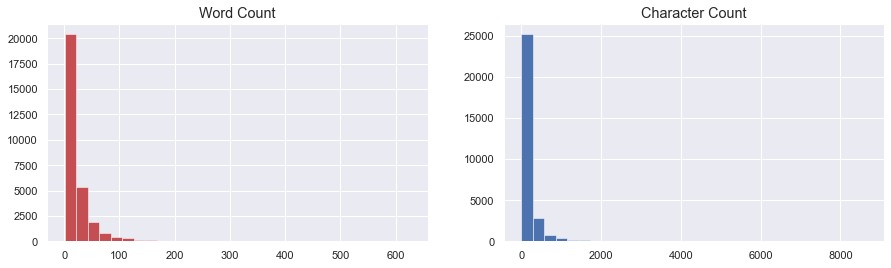

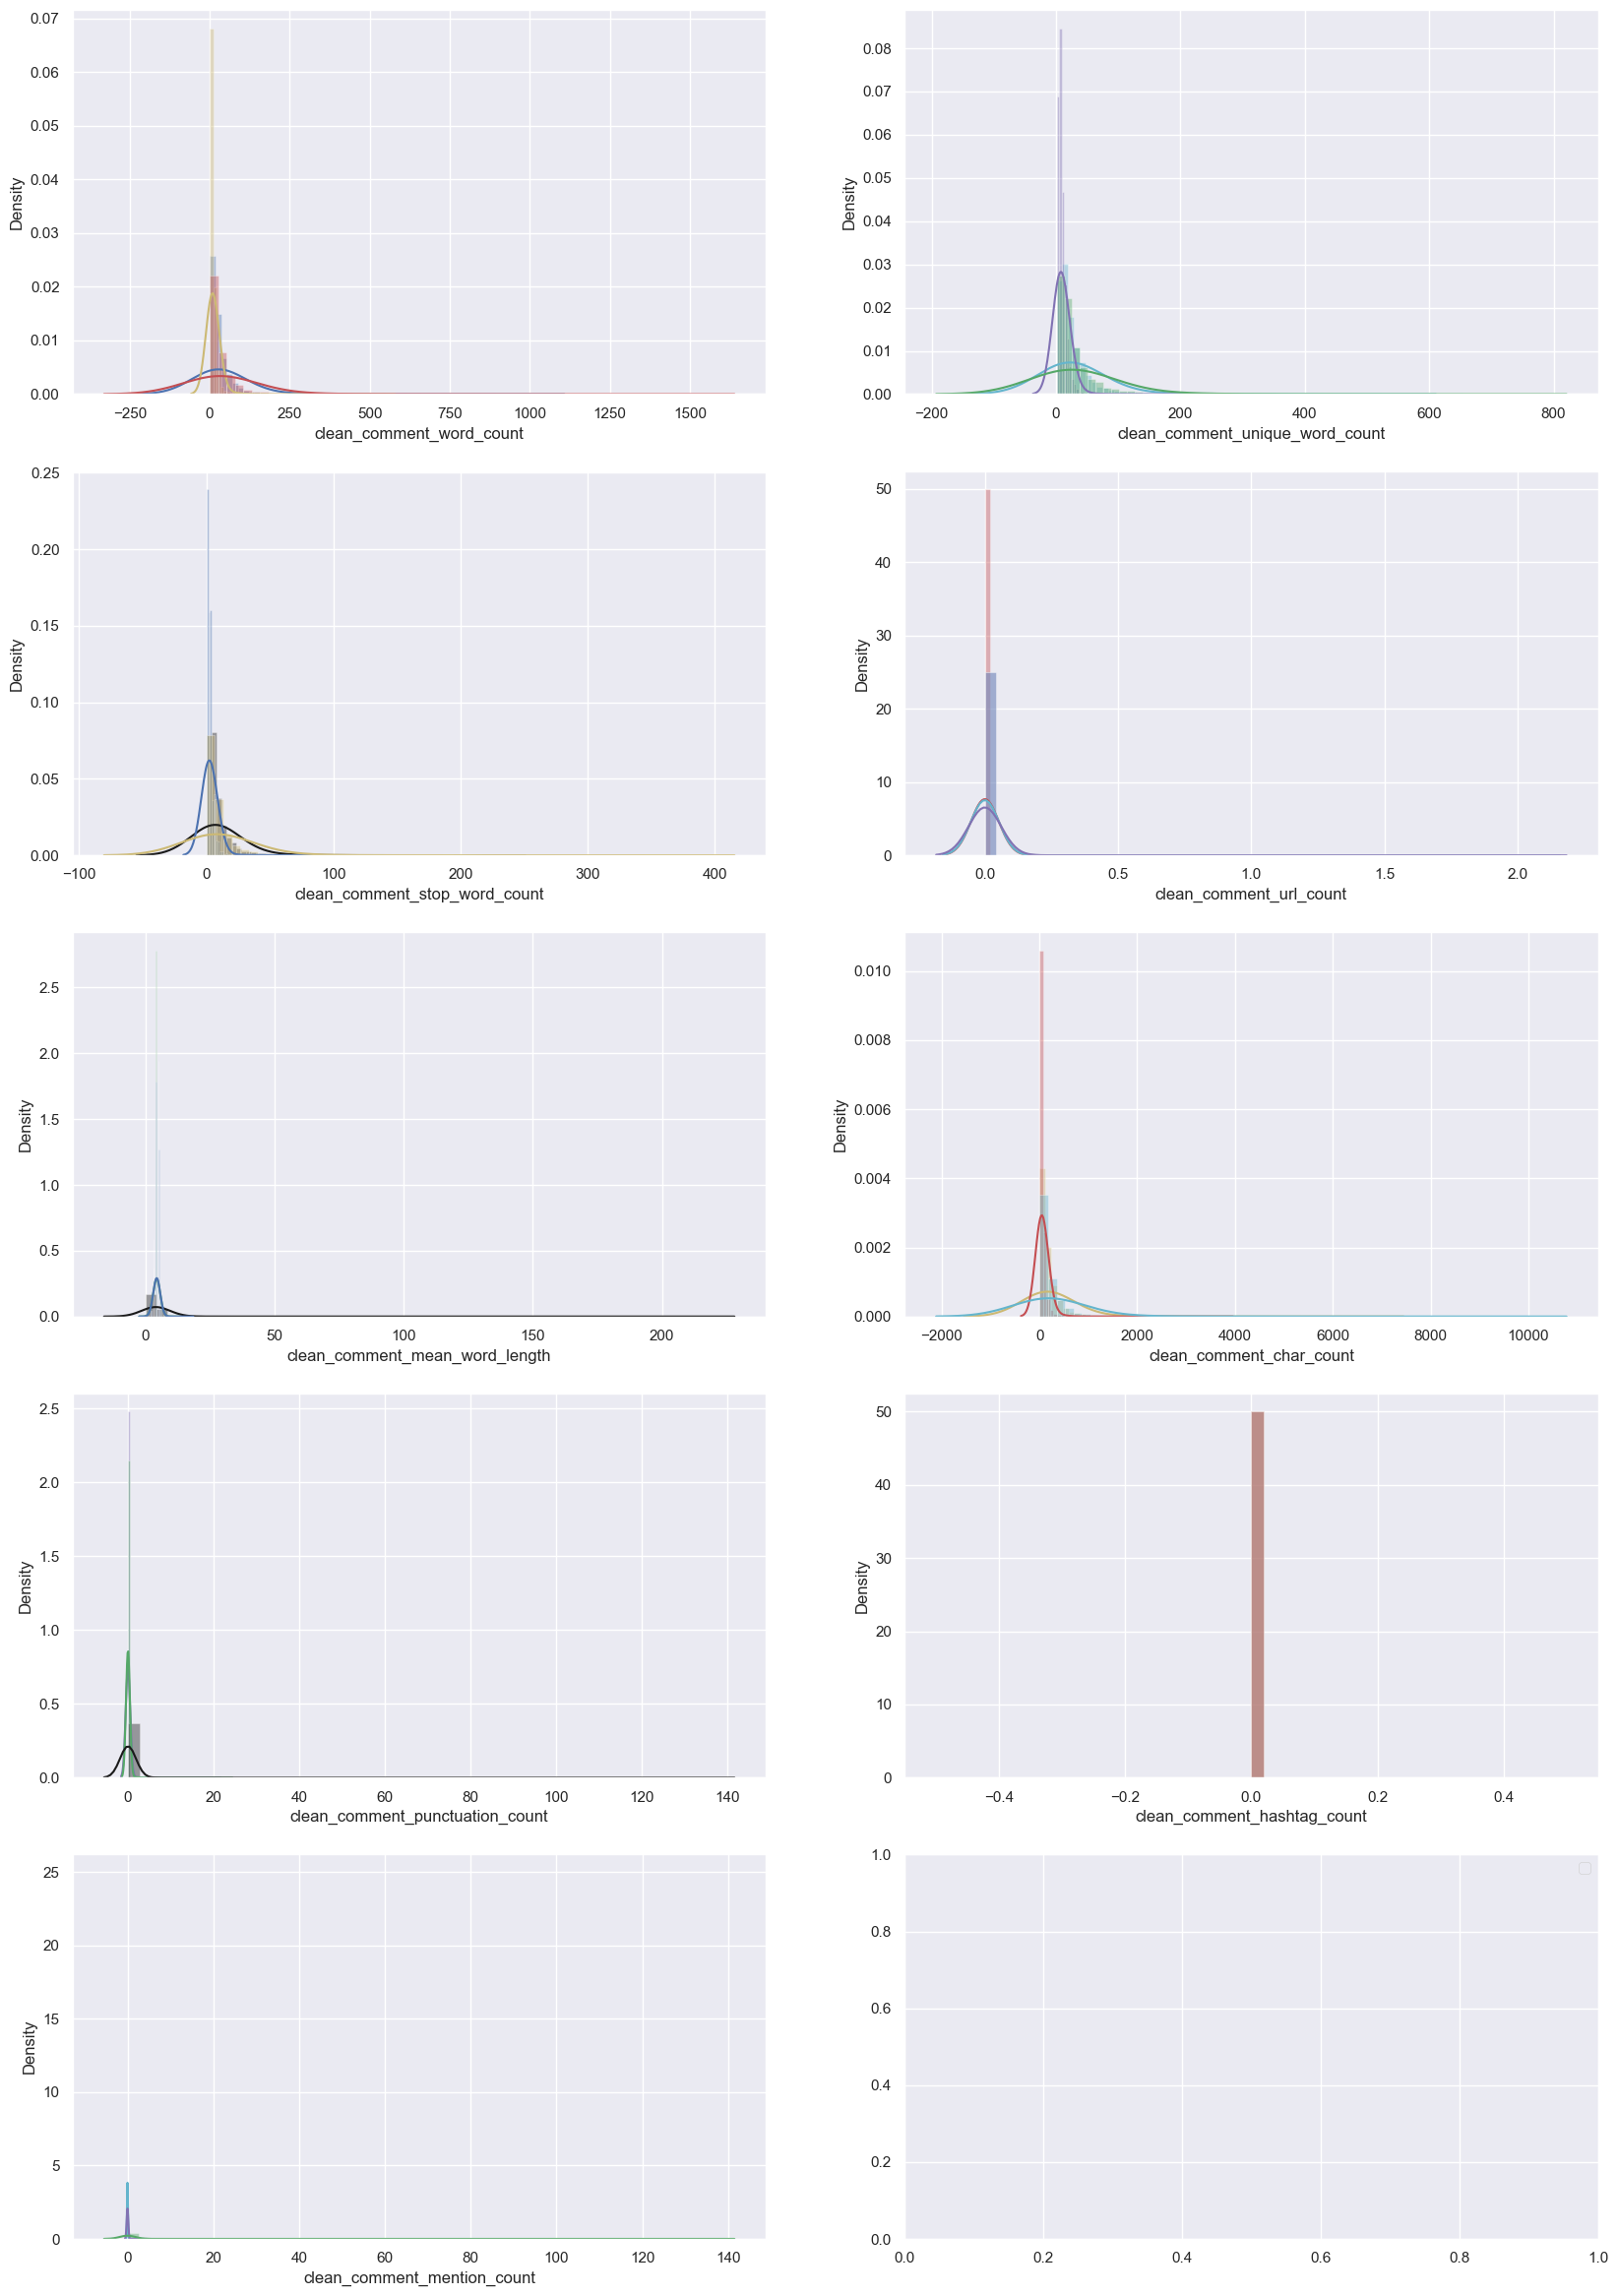

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for clean_comment column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 51 seconds
        Time Taken for Processing text in data = 99 seconds
Train data Text cleaning completed. Time taken = 159 seconds

For target = category

    For class = -1
Top 200 n-grams
: ['fuck', 'what', 'not', 'they', 'but', 'people', 'will', 'like', 'bjp', 'modi', 'india', 'do', 'shit', 'now', 'who', 'how', 'there', 'don', 'why', 'their', 'make', 'bad', 'go', 'when', 'think', 'even', 'these', 'time', 'know', 'them', 'would', 'country', 'your', 'his', 'come', 'see', 'take', 'because', 'indian', 'should', 'thing', 'congress', 'guy', 'wrong', 'give', 'party', 'look', 'our', 'mean', 'idiot', 'him', 'hate', 'vote', 'want', 'right', 'year', 'news', 'day', 'medium', 'government', 'also', 'stupid', 'use', 'wh

Training completed. Time taken for training = 9.1 minutes
Best Params of NLP pipeline are: {'multinomialnb__alpha': 0.08039991715696582, 'selectkbest__k': 26128, 'tfidfvectorizer__binary': False, 'tfidfvectorizer__encoding': 'latin-1', 'tfidfvectorizer__max_df': 0.07761383660001486}


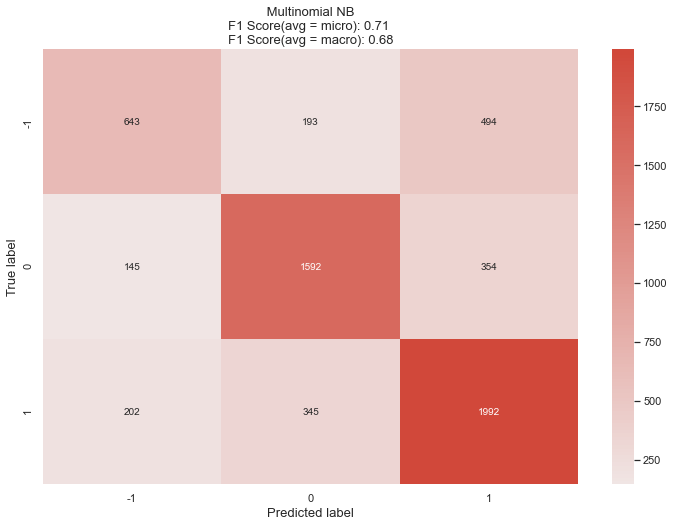

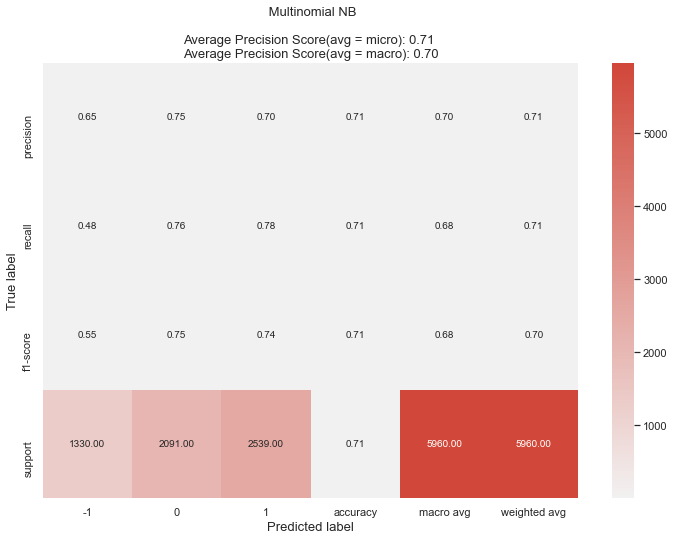

  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 38 seconds
        Time Taken for Processing text in data = 86 seconds
  Transforming Test data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 12 seconds
        Time Taken for Processing text in data = 24 seconds
Training best Auto_NLP Pipeline on full Train data...will be faster since best params are known
    Time Taken for Expanding emojis and abbreviations in data = 39 seconds
        Time Taken for Processing text in data = 85 seconds
    Returning best Auto_NLP pipeline to transform and make predictions on test data...
    Time Taken for Expanding emojis and abbreviations in data = 12 seconds
        Time Taken for Processing text in data = 26 seconds
Training completed. Time taken for Auto_NLP = 18.2 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [7]:
train_x, test_x, final, predicted= Auto_NLP(input_feature, train, test,target,score_type="balanced_accuracy",top_num_features=100,modeltype="Classification", verbose=2, build_model=True)

In [8]:
final.predict(test_x[input_feature])

    Time Taken for Expanding emojis and abbreviations in data = 14 seconds
        Time Taken for Processing text in data = 25 seconds


array([-1,  0,  1, ...,  1, -1,  1], dtype=int64)